<a href="https://colab.research.google.com/github/aayushibeniwal/Stock-Buy-Sell-Prediction/blob/master/Stock_buying_and_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#upload files from local
#from google.colab import files
#uploaded = files.upload()

In [0]:
dataset_share_train = pd.read_csv('share_train_data.csv', header = None)
dataset_share_test = pd.read_csv('share_test_data.csv', header = None)

In [0]:
dataset_share_train.shape

(12189, 36)

In [0]:
dataset_share_test.shape

(1275, 34)

In [0]:
dataset_share_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,share_1,2000,JAN,345.0,376.4,344.4,361.7,347.5,350.2,383.8,358.5,357.0,381.3,359.1,377.2,381.4,354.7,369.8,359.3,377.8,372.8,381.0,353.4,380.6,354.4,365.2,358.6,383.5,366.9,373.7,367.8,347.0,379.0,352.8,3.0,7.0
1,share_2,2000,JAN,114.6,87.2,114.3,85.6,107.9,94.3,81.6,107.9,91.4,84.9,104.6,98.2,99.4,98.6,100.8,83.5,115.9,108.7,93.9,99.4,95.2,98.5,100.7,116.1,102.0,94.9,93.4,98.7,112.6,92.5,113.6,7.0,24.0
2,share_3,2000,JAN,286.3,271.4,272.9,298.4,265.1,266.3,274.4,298.2,290.3,294.8,281.7,266.0,298.8,267.3,263.8,272.1,290.1,277.0,272.9,285.7,285.9,276.5,292.8,272.6,270.5,281.0,276.3,287.8,289.2,300.8,293.7,15.0,30.0
3,share_4,2000,JAN,278.9,263.3,256.2,287.8,280.0,267.2,272.5,265.2,272.8,285.2,269.5,276.8,254.5,262.9,281.5,271.2,270.9,290.5,284.7,282.1,273.7,287.3,267.7,260.0,284.1,281.0,274.4,274.9,272.5,269.3,255.2,13.0,18.0
4,share_5,2000,JAN,154.4,163.1,136.9,138.9,145.5,158.3,165.5,149.8,146.3,169.5,163.7,169.1,169.5,171.3,146.3,168.7,167.0,146.5,153.8,158.1,158.8,145.2,131.6,167.0,137.1,163.1,135.6,158.5,148.0,136.2,162.8,23.0,24.0


In [0]:
dataset_share_train.isna().sum().sort_values(ascending=False)

35    5100
34    1020
33     765
9        0
15       0
14       0
13       0
12       0
11       0
10       0
8        0
1        0
16       0
6        0
5        0
4        0
3        0
2        0
7        0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
0        0
dtype: int64

In [0]:
dataset_share_test.isnull().sum().sort_values(ascending=False)

33    510
32    102
31     51
1       0
2       0
3       0
4       0
5       0
6       0
15      0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
7       0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
0       0
dtype: int64

In [0]:
dataset_share_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 36 columns):
0     12189 non-null object
1     12189 non-null int64
2     12189 non-null object
3     12189 non-null float64
4     12189 non-null float64
5     12189 non-null float64
6     12189 non-null float64
7     12189 non-null float64
8     12189 non-null float64
9     12189 non-null float64
10    12189 non-null float64
11    12189 non-null float64
12    12189 non-null float64
13    12189 non-null float64
14    12189 non-null float64
15    12189 non-null float64
16    12189 non-null float64
17    12189 non-null float64
18    12189 non-null float64
19    12189 non-null float64
20    12189 non-null float64
21    12189 non-null float64
22    12189 non-null float64
23    12189 non-null float64
24    12189 non-null float64
25    12189 non-null float64
26    12189 non-null float64
27    12189 non-null float64
28    12189 non-null float64
29    12189 non-null float64
30    12189 non-null floa

In [0]:
dataset_share_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 34 columns):
0     1275 non-null object
1     1275 non-null int64
2     1275 non-null object
3     1275 non-null float64
4     1275 non-null float64
5     1275 non-null float64
6     1275 non-null float64
7     1275 non-null float64
8     1275 non-null float64
9     1275 non-null float64
10    1275 non-null float64
11    1275 non-null float64
12    1275 non-null float64
13    1275 non-null float64
14    1275 non-null float64
15    1275 non-null float64
16    1275 non-null float64
17    1275 non-null float64
18    1275 non-null float64
19    1275 non-null float64
20    1275 non-null float64
21    1275 non-null float64
22    1275 non-null float64
23    1275 non-null float64
24    1275 non-null float64
25    1275 non-null float64
26    1275 non-null float64
27    1275 non-null float64
28    1275 non-null float64
29    1275 non-null float64
30    1275 non-null float64
31    1224 non-null float64
3

In [0]:
dataset_share_train[0].nunique()

51

Replace null values with median value of particular share.

In [0]:
dataset_share_train[33] = dataset_share_train.groupby(0)[33].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_train[34] = dataset_share_train.groupby(0)[34].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_train[35] = dataset_share_train.groupby(0)[35].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_train.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64

In [0]:
dataset_share_test[31] = dataset_share_train.groupby(0)[31].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_test[32] = dataset_share_train.groupby(0)[32].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_test[33] = dataset_share_train.groupby(0)[33].transform(
    lambda x: x.fillna(x.median()))

In [0]:
dataset_share_test.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

In [0]:
X = dataset_share_train.copy()  #independent variable


In [0]:
Y = pd.concat([X.pop(column) for column in [34, 35]], 1) #dependent variable--> we want to predict buy day and sell day so taking 2D array

In [0]:
Y.isna().sum()

34    0
35    0
dtype: int64

In [0]:
X.head()  #independent variable without buy and sell

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,share_1,2000,JAN,345.0,376.4,344.4,361.7,347.5,350.2,383.8,358.5,357.0,381.3,359.1,377.2,381.4,354.7,369.8,359.3,377.8,372.8,381.0,353.4,380.6,354.4,365.2,358.6,383.5,366.9,373.7,367.8,347.0,379.0,352.8
1,share_2,2000,JAN,114.6,87.2,114.3,85.6,107.9,94.3,81.6,107.9,91.4,84.9,104.6,98.2,99.4,98.6,100.8,83.5,115.9,108.7,93.9,99.4,95.2,98.5,100.7,116.1,102.0,94.9,93.4,98.7,112.6,92.5,113.6
2,share_3,2000,JAN,286.3,271.4,272.9,298.4,265.1,266.3,274.4,298.2,290.3,294.8,281.7,266.0,298.8,267.3,263.8,272.1,290.1,277.0,272.9,285.7,285.9,276.5,292.8,272.6,270.5,281.0,276.3,287.8,289.2,300.8,293.7
3,share_4,2000,JAN,278.9,263.3,256.2,287.8,280.0,267.2,272.5,265.2,272.8,285.2,269.5,276.8,254.5,262.9,281.5,271.2,270.9,290.5,284.7,282.1,273.7,287.3,267.7,260.0,284.1,281.0,274.4,274.9,272.5,269.3,255.2
4,share_5,2000,JAN,154.4,163.1,136.9,138.9,145.5,158.3,165.5,149.8,146.3,169.5,163.7,169.1,169.5,171.3,146.3,168.7,167.0,146.5,153.8,158.1,158.8,145.2,131.6,167.0,137.1,163.1,135.6,158.5,148.0,136.2,162.8


Text(0, 0.5, 'Dates')

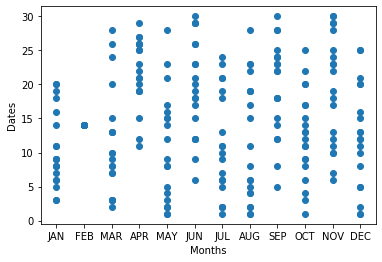

In [0]:
#Plotting graph for share 1 data
share_1_data = dataset_share_train[dataset_share_train[0]=='share_1']
plt.scatter(share_1_data[2], share_1_data[34])
plt.xlabel('Months')
plt.ylabel('Dates')

Text(0, 0.5, 'Dates')

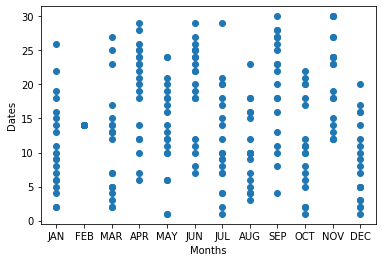

In [0]:
#Plotting graph for share 2 data
share_2_data = dataset_share_train[dataset_share_train[0]=='share_2']
plt.scatter(share_2_data[2], share_2_data[34])
plt.xlabel('Months')
plt.ylabel('Dates')

In [0]:
#concatinating test data with train
X = pd.concat([X, dataset_share_test])

In [0]:
X.shape

(13464, 34)

In [0]:
#looking at last few rows of train after concatination
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
1270,share_47,2021,DEC,493.6,477.4,489.5,466.9,503.9,499.3,479.4,494.4,499.9,497.2,495.1,483.4,471.0,504.3,474.1,470.0,466.1,494.0,470.5,498.9,505.8,495.4,498.1,479.3,489.0,493.0,467.1,494.8,483.5,486.8,485.0
1271,share_48,2021,DEC,257.7,236.3,250.2,243.6,242.2,226.7,246.8,259.0,243.1,234.2,252.4,233.7,238.0,230.5,246.9,226.5,261.8,235.1,232.4,246.1,238.4,233.7,244.4,258.0,259.7,235.9,238.0,245.2,241.1,227.8,263.0
1272,share_49,2021,DEC,249.5,221.4,247.0,226.4,237.0,222.0,225.8,251.8,222.7,250.5,233.8,218.7,225.4,243.0,228.4,234.9,251.9,253.0,221.4,226.6,218.6,229.3,215.9,224.6,237.5,217.4,230.1,223.6,242.6,231.5,215.3
1273,share_50,2021,DEC,153.7,171.4,163.7,167.9,176.5,149.3,181.5,172.6,163.1,180.4,180.7,179.3,171.4,160.7,154.8,176.1,163.5,184.1,164.1,153.1,175.1,183.5,168.6,145.9,158.7,157.0,174.3,167.5,176.9,148.5,173.6
1274,share_51,2021,DEC,65.1,36.5,74.2,69.5,55.4,66.5,57.4,66.6,69.3,50.7,42.4,38.5,46.9,42.2,70.1,36.9,46.5,65.8,52.4,60.8,62.1,70.1,68.2,46.7,41.4,64.1,41.3,62.5,50.1,75.4,51.1


In [0]:
#Get dummies for share number in training set
share_num=pd.get_dummies(X[0],prefix='share_')
X=pd.concat([X,share_num],axis=1)
X.drop([0],inplace=True,axis=1)

In [0]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,share__share_1,share__share_10,share__share_11,share__share_12,share__share_13,share__share_14,share__share_15,...,share__share_2,share__share_20,share__share_21,share__share_22,share__share_23,share__share_24,share__share_25,share__share_26,share__share_27,share__share_28,share__share_29,share__share_3,share__share_30,share__share_31,share__share_32,share__share_33,share__share_34,share__share_35,share__share_36,share__share_37,share__share_38,share__share_39,share__share_4,share__share_40,share__share_41,share__share_42,share__share_43,share__share_44,share__share_45,share__share_46,share__share_47,share__share_48,share__share_49,share__share_5,share__share_50,share__share_51,share__share_6,share__share_7,share__share_8,share__share_9
0,2000,JAN,345.0,376.4,344.4,361.7,347.5,350.2,383.8,358.5,357.0,381.3,359.1,377.2,381.4,354.7,369.8,359.3,377.8,372.8,381.0,353.4,380.6,354.4,365.2,358.6,383.5,366.9,373.7,367.8,347.0,379.0,352.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,JAN,114.6,87.2,114.3,85.6,107.9,94.3,81.6,107.9,91.4,84.9,104.6,98.2,99.4,98.6,100.8,83.5,115.9,108.7,93.9,99.4,95.2,98.5,100.7,116.1,102.0,94.9,93.4,98.7,112.6,92.5,113.6,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2000,JAN,286.3,271.4,272.9,298.4,265.1,266.3,274.4,298.2,290.3,294.8,281.7,266.0,298.8,267.3,263.8,272.1,290.1,277.0,272.9,285.7,285.9,276.5,292.8,272.6,270.5,281.0,276.3,287.8,289.2,300.8,293.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,JAN,278.9,263.3,256.2,287.8,280.0,267.2,272.5,265.2,272.8,285.2,269.5,276.8,254.5,262.9,281.5,271.2,270.9,290.5,284.7,282.1,273.7,287.3,267.7,260.0,284.1,281.0,274.4,274.9,272.5,269.3,255.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000,JAN,154.4,163.1,136.9,138.9,145.5,158.3,165.5,149.8,146.3,169.5,163.7,169.1,169.5,171.3,146.3,168.7,167.0,146.5,153.8,158.1,158.8,145.2,131.6,167.0,137.1,163.1,135.6,158.5,148.0,136.2,162.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
X = X.drop([1], axis = 1)

In [0]:
X.shape

(13464, 83)

In [0]:
X.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,share__share_1,share__share_10,share__share_11,share__share_12,share__share_13,share__share_14,share__share_15,share__share_16,...,share__share_2,share__share_20,share__share_21,share__share_22,share__share_23,share__share_24,share__share_25,share__share_26,share__share_27,share__share_28,share__share_29,share__share_3,share__share_30,share__share_31,share__share_32,share__share_33,share__share_34,share__share_35,share__share_36,share__share_37,share__share_38,share__share_39,share__share_4,share__share_40,share__share_41,share__share_42,share__share_43,share__share_44,share__share_45,share__share_46,share__share_47,share__share_48,share__share_49,share__share_5,share__share_50,share__share_51,share__share_6,share__share_7,share__share_8,share__share_9
0,JAN,345.0,376.4,344.4,361.7,347.5,350.2,383.8,358.5,357.0,381.3,359.1,377.2,381.4,354.7,369.8,359.3,377.8,372.8,381.0,353.4,380.6,354.4,365.2,358.6,383.5,366.9,373.7,367.8,347.0,379.0,352.8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,JAN,114.6,87.2,114.3,85.6,107.9,94.3,81.6,107.9,91.4,84.9,104.6,98.2,99.4,98.6,100.8,83.5,115.9,108.7,93.9,99.4,95.2,98.5,100.7,116.1,102.0,94.9,93.4,98.7,112.6,92.5,113.6,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,JAN,286.3,271.4,272.9,298.4,265.1,266.3,274.4,298.2,290.3,294.8,281.7,266.0,298.8,267.3,263.8,272.1,290.1,277.0,272.9,285.7,285.9,276.5,292.8,272.6,270.5,281.0,276.3,287.8,289.2,300.8,293.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,JAN,278.9,263.3,256.2,287.8,280.0,267.2,272.5,265.2,272.8,285.2,269.5,276.8,254.5,262.9,281.5,271.2,270.9,290.5,284.7,282.1,273.7,287.3,267.7,260.0,284.1,281.0,274.4,274.9,272.5,269.3,255.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,JAN,154.4,163.1,136.9,138.9,145.5,158.3,165.5,149.8,146.3,169.5,163.7,169.1,169.5,171.3,146.3,168.7,167.0,146.5,153.8,158.1,158.8,145.2,131.6,167.0,137.1,163.1,135.6,158.5,148.0,136.2,162.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
#The months are categoral so converting them to numbers using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[2] = le.fit_transform(X[2])

In [0]:
X[2].unique()

array([ 4,  3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2])

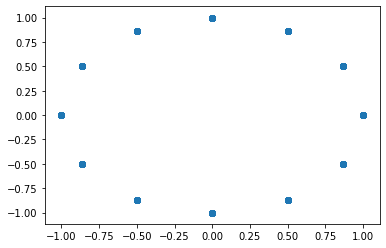

In [0]:
#Making months cyclic
sin_m = pd.DataFrame(np.sin(2.*np.pi*X[2]/12))
cos_m = pd.DataFrame(np.cos(2.*np.pi*X[2]/12))

sin_m.columns = ['sin_m']
cos_m.columns = ['cos_m']

#concatinating months in cyclic form in the independent set
X=pd.concat([X,sin_m, cos_m],axis=1)
X.drop([2],inplace=True,axis=1)

plt.scatter(sin_m, cos_m)

In [0]:
import seaborn as sns


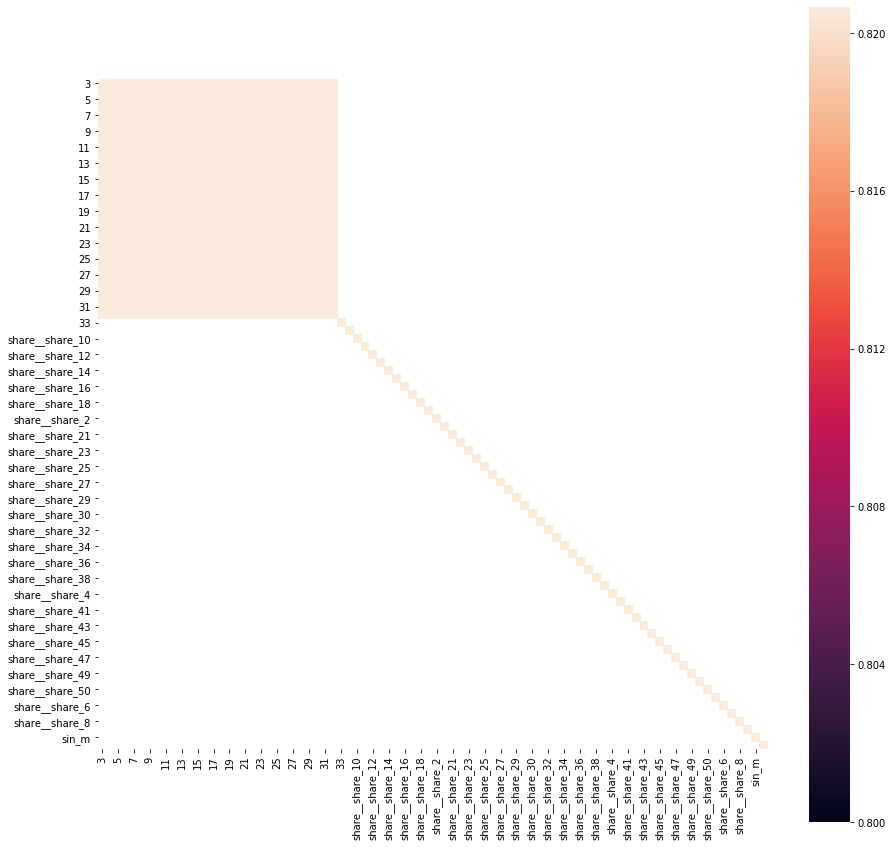

In [0]:
#Plotting the heat map to see correlation between variables(if close to -1 or +1 more correlation, if close to 0 less)
C_mat = X.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat[C_mat>0.8], vmax = .8, square = True)
plt.show()

In [0]:
X.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,share__share_1,share__share_10,share__share_11,share__share_12,share__share_13,share__share_14,share__share_15,share__share_16,share__share_17,...,share__share_21,share__share_22,share__share_23,share__share_24,share__share_25,share__share_26,share__share_27,share__share_28,share__share_29,share__share_3,share__share_30,share__share_31,share__share_32,share__share_33,share__share_34,share__share_35,share__share_36,share__share_37,share__share_38,share__share_39,share__share_4,share__share_40,share__share_41,share__share_42,share__share_43,share__share_44,share__share_45,share__share_46,share__share_47,share__share_48,share__share_49,share__share_5,share__share_50,share__share_51,share__share_6,share__share_7,share__share_8,share__share_9,sin_m,cos_m
0,345.0,376.4,344.4,361.7,347.5,350.2,383.8,358.5,357.0,381.3,359.1,377.2,381.4,354.7,369.8,359.3,377.8,372.8,381.0,353.4,380.6,354.4,365.2,358.6,383.5,366.9,373.7,367.8,347.0,379.0,352.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,-0.5
1,114.6,87.2,114.3,85.6,107.9,94.3,81.6,107.9,91.4,84.9,104.6,98.2,99.4,98.6,100.8,83.5,115.9,108.7,93.9,99.4,95.2,98.5,100.7,116.1,102.0,94.9,93.4,98.7,112.6,92.5,113.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,-0.5
2,286.3,271.4,272.9,298.4,265.1,266.3,274.4,298.2,290.3,294.8,281.7,266.0,298.8,267.3,263.8,272.1,290.1,277.0,272.9,285.7,285.9,276.5,292.8,272.6,270.5,281.0,276.3,287.8,289.2,300.8,293.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,-0.5
3,278.9,263.3,256.2,287.8,280.0,267.2,272.5,265.2,272.8,285.2,269.5,276.8,254.5,262.9,281.5,271.2,270.9,290.5,284.7,282.1,273.7,287.3,267.7,260.0,284.1,281.0,274.4,274.9,272.5,269.3,255.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.866025,-0.5
4,154.4,163.1,136.9,138.9,145.5,158.3,165.5,149.8,146.3,169.5,163.7,169.1,169.5,171.3,146.3,168.7,167.0,146.5,153.8,158.1,158.8,145.2,131.6,167.0,137.1,163.1,135.6,158.5,148.0,136.2,162.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.866025,-0.5


In [0]:
Y.tail()

,34,35
12184,20.0,22.0
12185,10.0,21.0
12186,28.0,22.0
12187,10.0,20.0
12188,8.0,23.0


In [0]:
#Splitting to train and test set, in training  set there were 12189 rows
X_train = X.iloc[:12189, :]
X_test = X.iloc[12189:, :] 

In [0]:
#Splitting into training (80%) and validation set (20%)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, Y, test_size=0.2, random_state=42)

In [0]:
import tensorflow as tf

tf.__version__

'1.15.0'

In [0]:
#Expanding to see all colums and rows instead of few
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout

In [0]:
X_test.isna().sum()

3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 0
11                 0
12                 0
13                 0
14                 0
15                 0
16                 0
17                 0
18                 0
19                 0
20                 0
21                 0
22                 0
23                 0
24                 0
25                 0
26                 0
27                 0
28                 0
29                 0
30                 0
31                 0
32                 0
33                 0
share__share_1     0
share__share_10    0
share__share_11    0
share__share_12    0
share__share_13    0
share__share_14    0
share__share_15    0
share__share_16    0
share__share_17    0
share__share_18    0
share__share_19    0
share__share_2     0
share__share_20    0
share__share_21    0
share__share_22    0
share__share_23    0
share__share_

In [0]:
X_train.shape

(9751, 84)

In [0]:
#Callback function to stop the epochs after mae(mean absolute error) is 4.3 or less
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<=4.3):
            print("\nReached loss less than 4.3!")
            self.model.stop_training = True


In [0]:

callbacks = myCallback()

In [0]:
#Adding 5 nn layers
model2 = Sequential()

model2.add(Dense(128, activation='relu', kernel_initializer='normal', input_dim = X_train.shape[1]))
model2.add(Dense(64, activation='relu', kernel_initializer='normal'))
model2.add(Dense(32, activation='relu', kernel_initializer='normal'))
model2.add(Dense(32, activation='relu', kernel_initializer='normal'))

model2.add(Dense(2, kernel_initializer='normal',activation='linear'))

model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model2.summary()

#can use optimizer as 'rmsprop' or 'adams' also
#relu activation function mean that if x>0 will return x otherwise 0, passes only positive values(including 0) to next layer

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10880     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 22,338
Trainable params: 22,338
Non-train

In [0]:
history2 = model2.fit(X_train, y_train, epochs=1000, batch_size=512, validation_data = (X_val, y_val),
                     callbacks = [callbacks])

Train on 9751 samples, validate on 2438 samples
Epoch 1/1000
9751/9751 [==============================] - 2s 174us/sample - loss: 14.4298 - mean_absolute_error: 14.4298 - val_loss: 9.7710 - val_mean_absolute_error: 9.7710
Epoch 2/1000
9751/9751 [==============================] - 0s 7us/sample - loss: 8.8650 - mean_absolute_error: 8.8650 - val_loss: 8.6136 - val_mean_absolute_error: 8.6136
Epoch 3/1000
9751/9751 [==============================] - 0s 7us/sample - loss: 8.4868 - mean_absolute_error: 8.4868 - val_loss: 8.3979 - val_mean_absolute_error: 8.3979
Epoch 4/1000
9751/9751 [==============================] - 0s 7us/sample - loss: 8.4177 - mean_absolute_error: 8.4177 - val_loss: 8.4041 - val_mean_absolute_error: 8.4041
Epoch 5/1000
9751/9751 [==============================] - 0s 8us/sample - loss: 8.3968 - mean_absolute_error: 8.3968 - val_loss: 8.3260 - val_mean_absolute_error: 8.3260
Epoch 6/1000
9751/9751 [==============================] - 0s 8us/sample - loss: 8.3467 - mean_abso

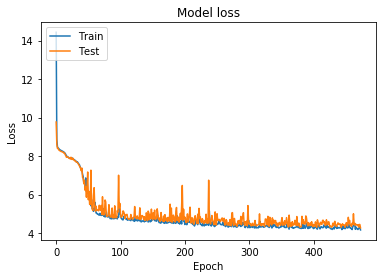

In [0]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

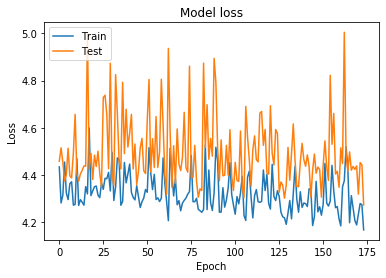

In [0]:
# Plot training & validation loss values more closely
plt.plot(history2.history['loss'][300:])
plt.plot(history2.history['val_loss'][300:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
#Predicted dependent variables in validation set
y_pred_val = model2.predict(X_val)

In [0]:
y_pred_val[:20]

array([[ 6.9629693, 21.875488 ],
       [11.496964 , 22.9444   ],
       [10.606695 , 20.777903 ],
       [14.766626 , 23.914944 ],
       [ 9.169851 , 22.560768 ],
       [14.052211 , 22.57946  ],
       [24.196625 , 19.83032  ],
       [18.638376 , 23.039074 ],
       [20.779177 , 22.318068 ],
       [21.268501 , 21.165787 ],
       [11.856447 , 26.766073 ],
       [ 5.987821 , 19.085608 ],
       [16.609045 , 21.133482 ],
       [14.46707  , 22.310984 ],
       [14.610457 , 22.07572  ],
       [12.390642 , 21.083548 ],
       [ 9.384152 , 18.486242 ],
       [23.629307 , 21.831736 ],
       [15.993782 , 21.30787  ],
       [13.489521 , 22.158041 ]], dtype=float32)

In [0]:
y_val[:20]

,34,35
3705,3.0,15.0
10017,15.0,20.0
3208,17.0,22.0
5652,4.0,30.0
2576,18.0,31.0
7933,17.0,30.0
304,30.0,20.0
5130,16.0,17.0
518,21.0,22.0
1139,20.0,21.0


In [0]:
#Predicted dependent variables in Test set
y_pred = model2.predict(X_test)

In [0]:
#Converting the output days values to integer values
y_pred = y_pred.astype(int)

In [0]:
y_pred[:20]

array([[10, 22],
       [ 5, 20],
       [10, 23],
       [ 8, 17],
       [ 9, 22],
       [ 8, 19],
       [ 6, 18],
       [ 9, 20],
       [ 8, 21],
       [ 7, 19],
       [11, 21],
       [18, 28],
       [10, 21],
       [14, 25],
       [10, 22],
       [ 8, 23],
       [13, 19],
       [11, 21],
       [ 8, 18],
       [10, 23]])

In [0]:
y_pred

array([[10, 22],
       [ 5, 20],
       [10, 23],
       ...,
       [ 9, 19],
       [ 7, 17],
       [19, 22]])

In [0]:
#dataset_share_test = pd.concat([dataset_share_test,pd.dataframe(y_pred)],axis=1)

In [0]:
#dataset_share_test.to_csv('dataset_share_test.csv', sep='|',index=False)

In [0]:
#from google.colab import files
#files.download('dataset_share_test.csv')